In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import warnings
warnings.filterwarnings("ignore")


### <center> Configuraciones

In [52]:
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['font.size'] = 12

### <center> Carga de data

In [53]:
df = pd.read_csv('/Users/n.arcos89/Documents/GitHub/Proyecto-Habitos-estudiantes/Data/student_habits_performance.csv')

In [54]:
df.head(2)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0


In [55]:
#comprobamos la extensión del dataset
df.shape

(1000, 16)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [57]:
df.isnull().sum()/len(df) * 100

student_id                       0.0
age                              0.0
gender                           0.0
study_hours_per_day              0.0
social_media_hours               0.0
netflix_hours                    0.0
part_time_job                    0.0
attendance_percentage            0.0
sleep_hours                      0.0
diet_quality                     0.0
exercise_frequency               0.0
parental_education_level         9.1
internet_quality                 0.0
mental_health_rating             0.0
extracurricular_participation    0.0
exam_score                       0.0
dtype: float64

In [58]:
#Comprobar las opciones de cada variable objeto para conocer mejor los datos. 

df['internet_quality'].unique()

array(['Average', 'Poor', 'Good'], dtype=object)

In [59]:
#también se puede hacer con .value_counts

df['diet_quality'].value_counts()

diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64

In [60]:
#Generar una funcion que selecciones las columnas que son objeto y nos devuelva los varlores unicos que tiene cada uno de ellas. Así unificamos los códigos anteriores y tenemos una visión global. 

def unique_values(df, cols):
    for col in cols:
        if df[col].dtype == 'object':  
            print(f"Unique values in {col}:")
            print(df[col].unique())
            print("\n")

# No usamos la primera columna porque es el id del estudiante y no tiene sentido ver los valores únicos de esa columna
unique_values(df, df.columns[1:])

Unique values in gender:
['Female' 'Male' 'Other']


Unique values in part_time_job:
['No' 'Yes']


Unique values in diet_quality:
['Fair' 'Good' 'Poor']


Unique values in parental_education_level:
['Master' 'High School' 'Bachelor' nan]


Unique values in internet_quality:
['Average' 'Poor' 'Good']


Unique values in extracurricular_participation:
['Yes' 'No']




In [61]:
#Cambiamos los valores nan a sin datos en parental_education_level
df['parental_education_level'].fillna('Sin datos', inplace=True)

In [62]:
#Comprobamos que no hay valores nulos
df.isnull().sum()/len(df) * 100

student_id                       0.0
age                              0.0
gender                           0.0
study_hours_per_day              0.0
social_media_hours               0.0
netflix_hours                    0.0
part_time_job                    0.0
attendance_percentage            0.0
sleep_hours                      0.0
diet_quality                     0.0
exercise_frequency               0.0
parental_education_level         0.0
internet_quality                 0.0
mental_health_rating             0.0
extracurricular_participation    0.0
exam_score                       0.0
dtype: float64

In [65]:
#comprobamos que no hay duplicados
df.duplicated().sum()

np.int64(0)

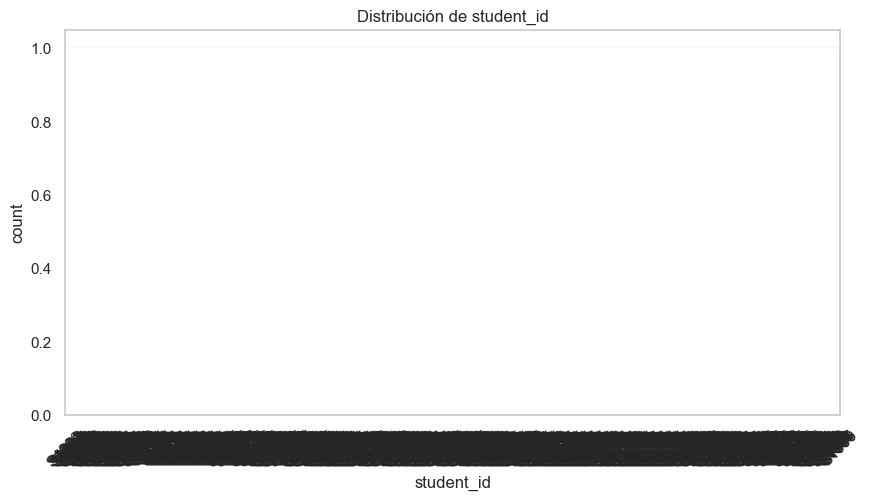

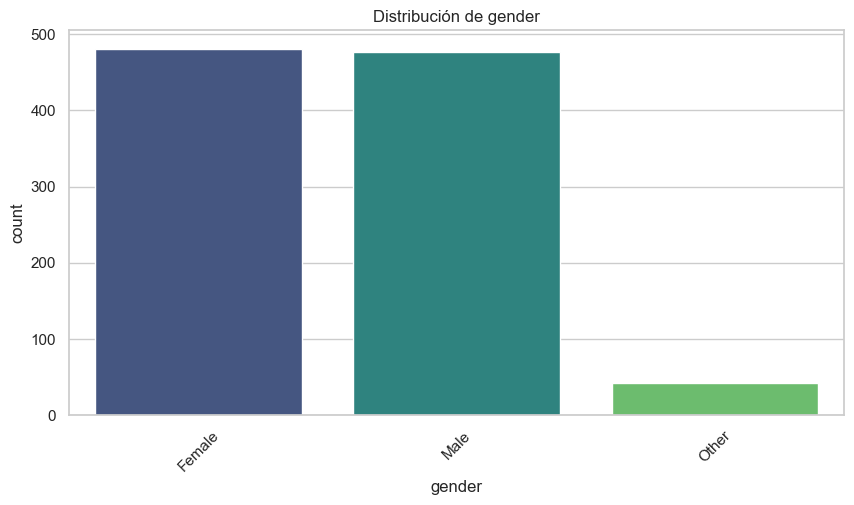

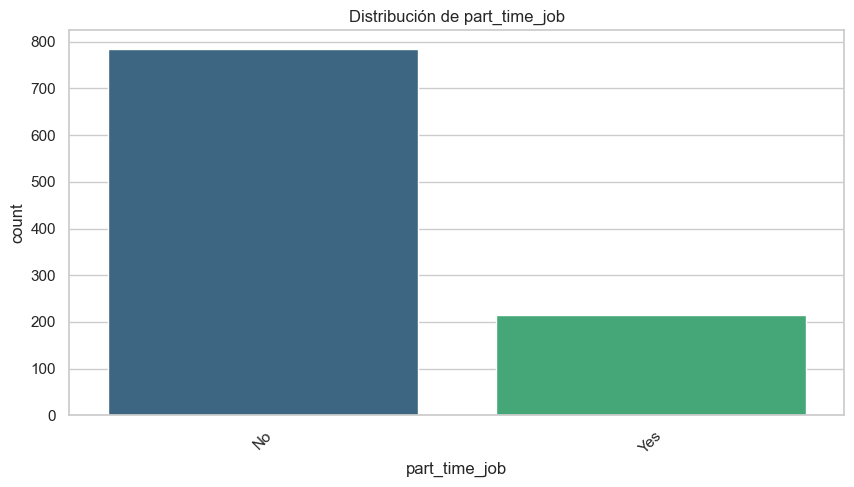

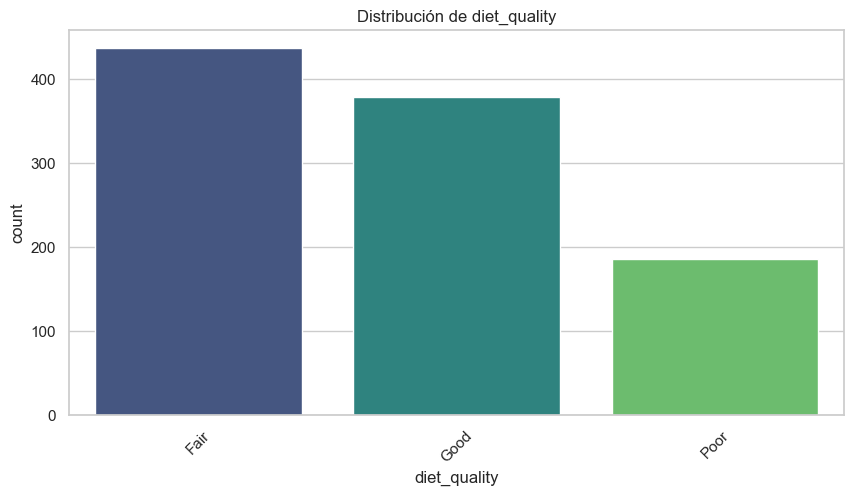

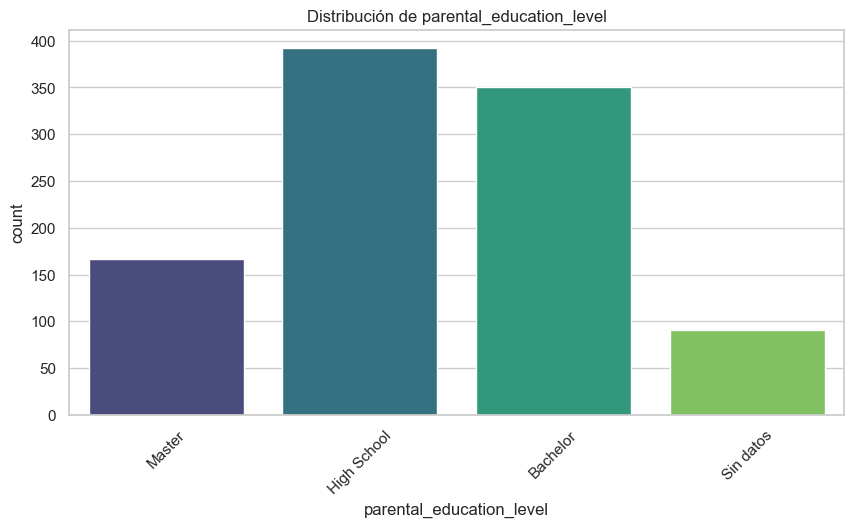

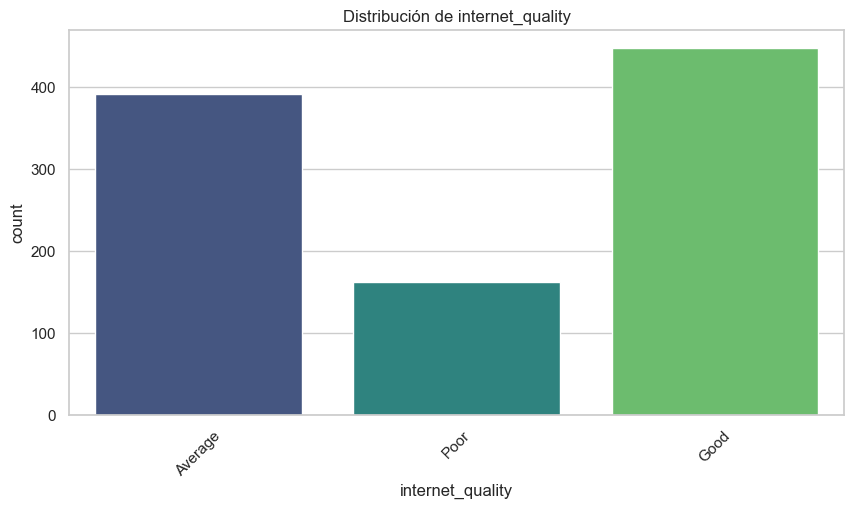

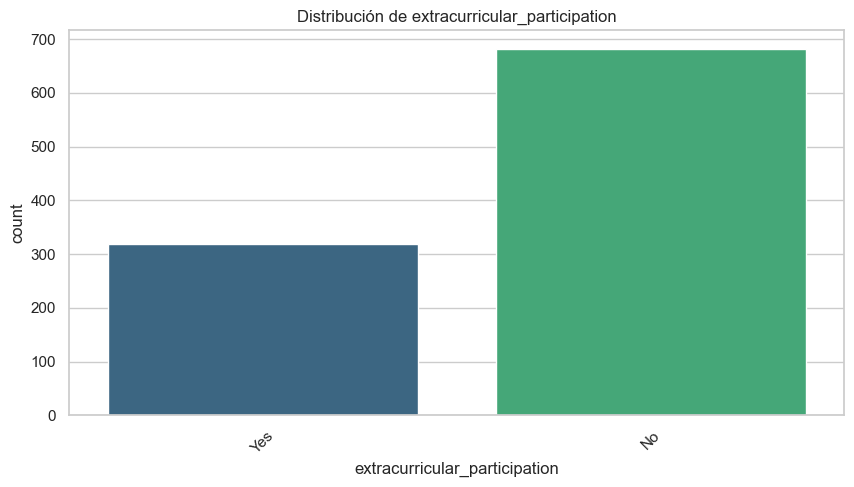

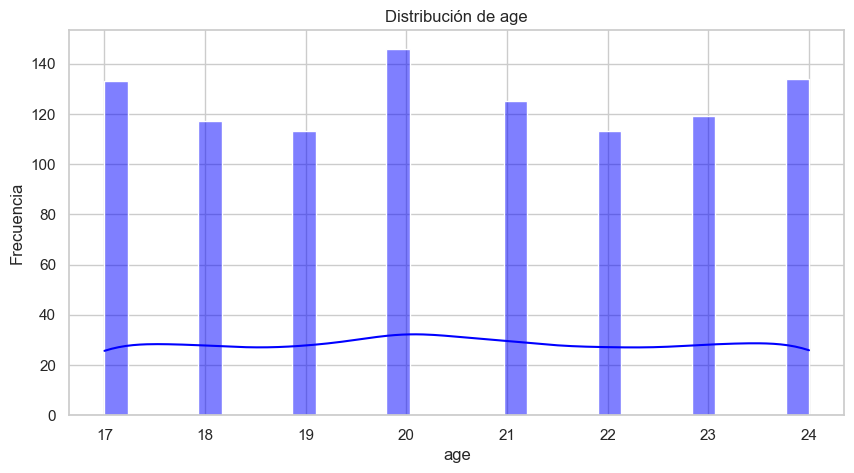

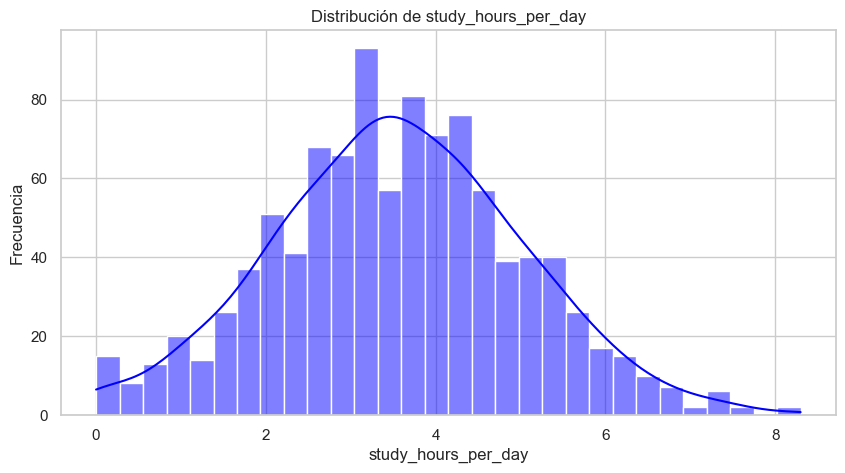

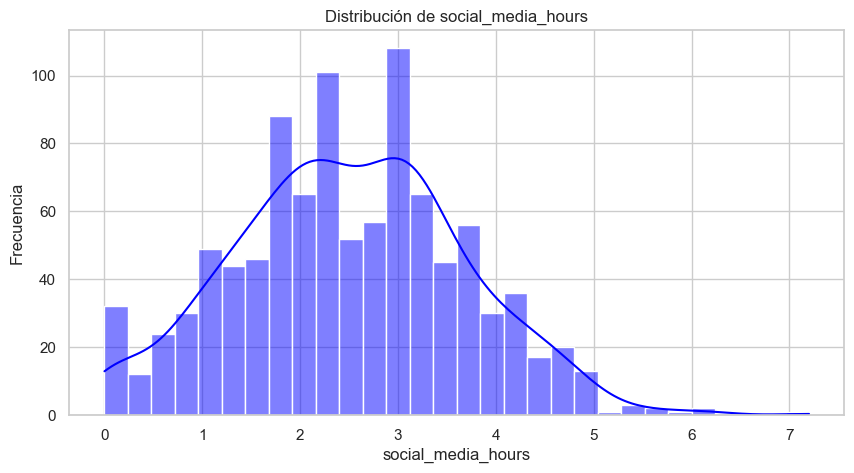

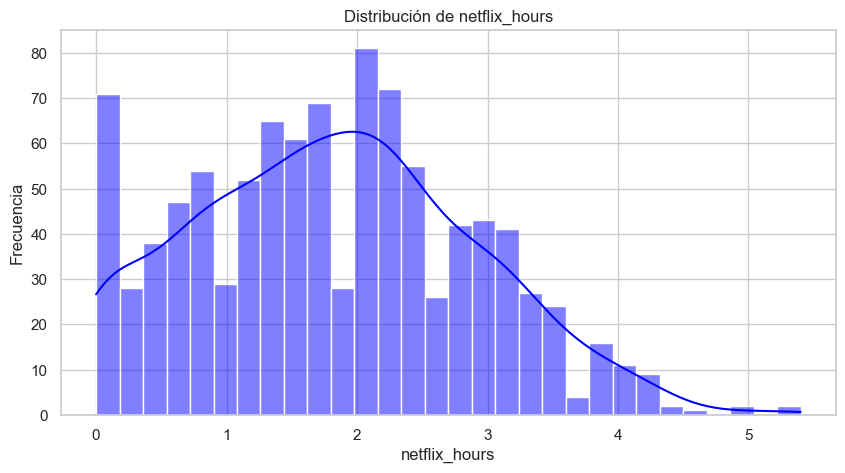

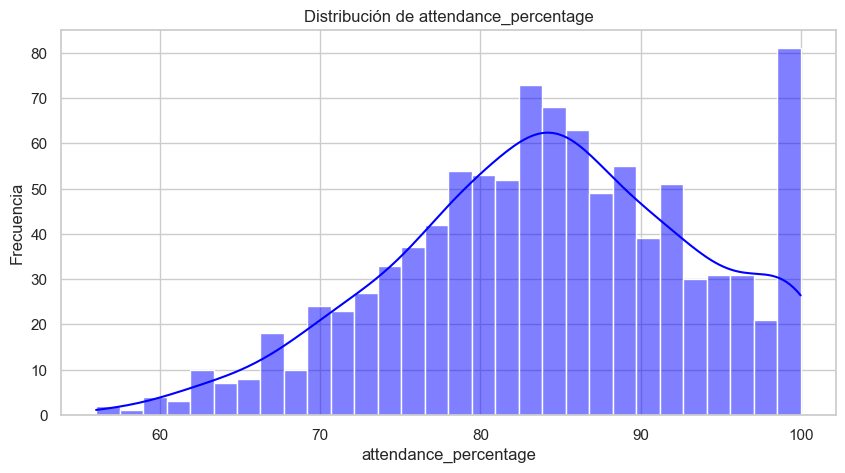

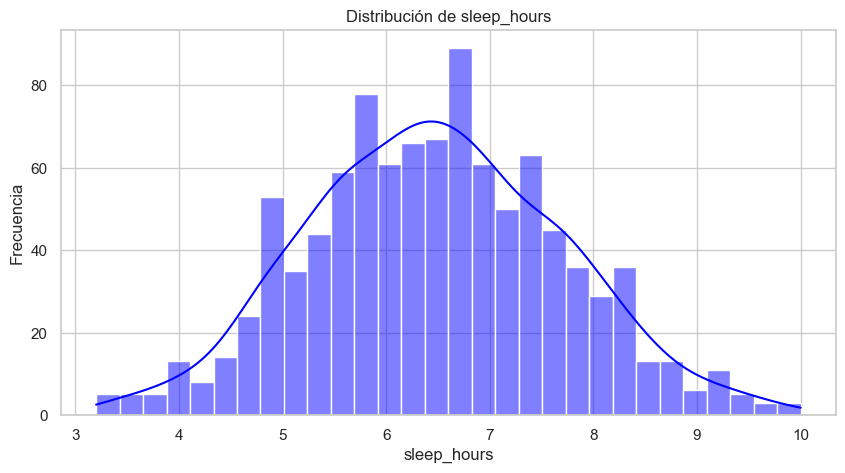

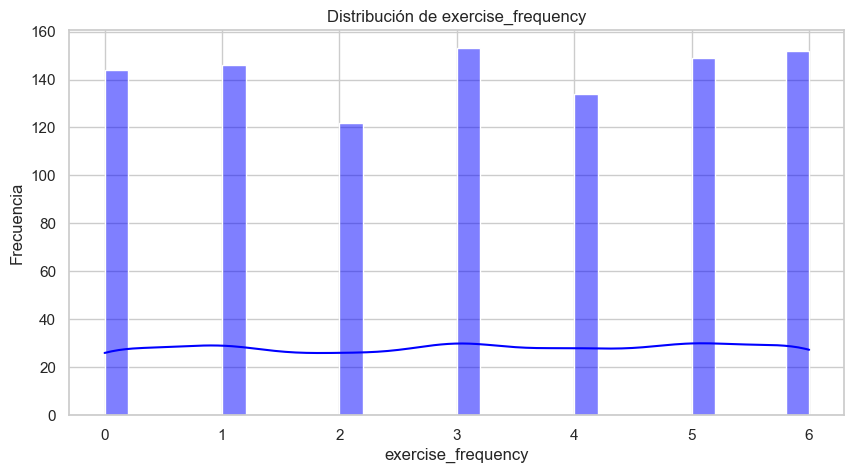

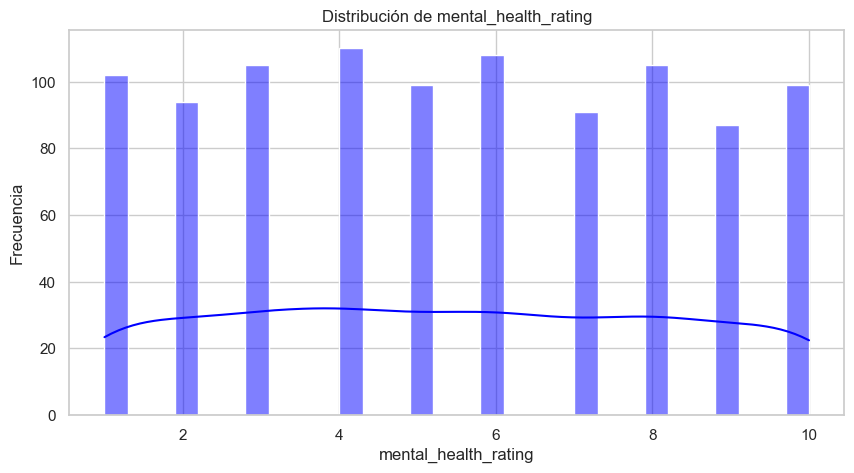

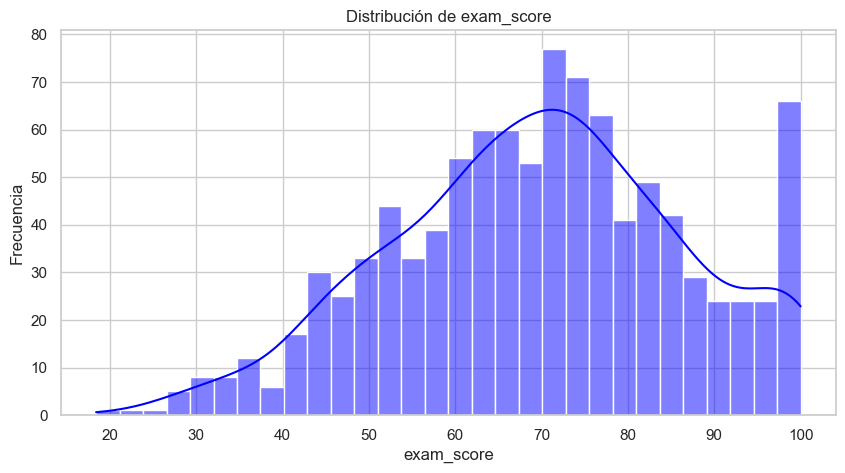

In [64]:
#Gráficas para obtener una visión general de los datos para entenderlos y extraer conclusiones

def plot_categorical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()
    
def plot_numerical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True, color='blue', bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in categorical_cols:
    plot_categorical_distribution(df, col)
for col in numerical_cols:
    plot_numerical_distribution(df, col)

### <center> EDA

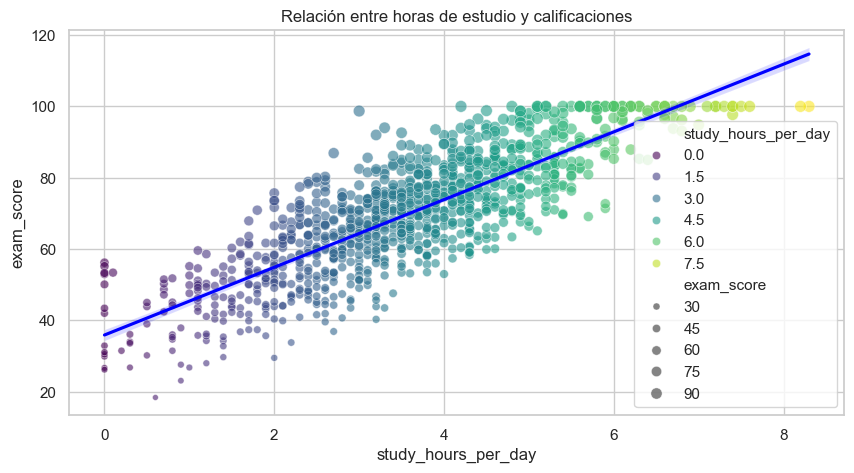

In [72]:
# Relación entre horas de estudio y calificaciones
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', size='exam_score', hue='study_hours_per_day', alpha=0.6, palette='viridis')

#Ejes y titulos
plt.title('Relación entre horas de estudio y calificaciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Calificaciones en exámenes')

#Linea de regresión
sns.regplot(data=df, x='study_hours_per_day', y='exam_score', scatter=False, color='blue')

#Mostrar la gráfica
plt.show()


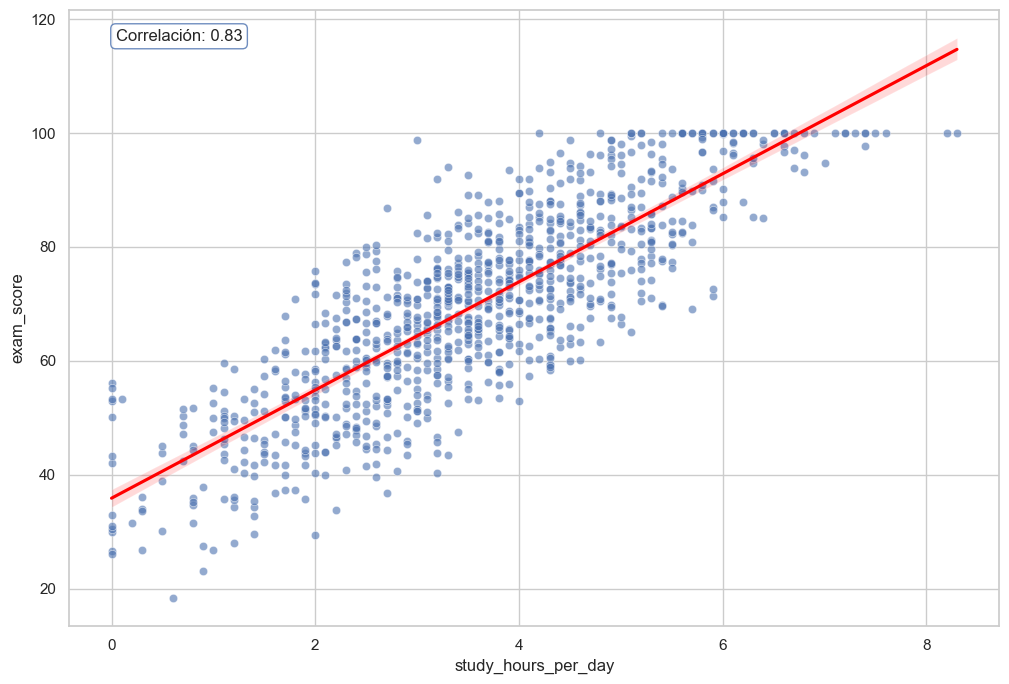

'\nLa función plt.annotate se utiliza para agregar una anotación en el gráfico. \nEl texto de la anotación es una cadena formateada (f\'Correlación: {corr:.2f}\'), \nque incluye el valor de la correlación (corr) redondeado a dos decimales. Este valor \nse calcula previamente con el método .corr() de pandas, que mide la relación lineal \nentre las dos columnas del DataFrame.\n\nEl parámetro xy=(0.05, 0.95) indica la posición de la anotación en coordenadas \nnormalizadas del eje (axes fraction), donde (0, 0) es la esquina inferior izquierda \ny (1, 1) es la esquina superior derecha del gráfico. Esto asegura que la anotación \nse coloque en la parte superior izquierda del gráfico, independientemente de los \nvalores de los datos.\n\nEl argumento bbox define un cuadro alrededor del texto de la anotación. Este cuadro \ntiene un estilo redondeado (boxstyle="round,pad=0.3"), un fondo blanco (fc="white"), \nun borde azul (ec="b"), un grosor de línea de 1 (lw=1) y una transparencia del 80% \n(a

In [73]:
# Relación entre horas de estudio y calificaciones
plt.figure(figsize=(12, 8)) # configuramos el tamaño de la figura
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df, alpha=0.6) # alpha es la transparencia del punto
plt.xlabel('Horas de Estudio por Día') 
plt.ylabel('Calificación en Examen')


# línea de regresión
sns.regplot(x='study_hours_per_day', y='exam_score', data=df, scatter=False, color='red') # scatter=False para no dibujar los puntos de nuevo

# correlación
corr = df['study_hours_per_day'].corr(df['exam_score']) # calculamos la correlación entre las dos variables
plt.annotate(f'Correlación: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',  
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1, alpha=0.8)) # anotamos la correlación en la figura mediante un cuadro 
plt.show() 
'''
La función plt.annotate se utiliza para agregar una anotación en el gráfico. 
El texto de la anotación es una cadena formateada (f'Correlación: {corr:.2f}'), 
que incluye el valor de la correlación (corr) redondeado a dos decimales. Este valor 
se calcula previamente con el método .corr() de pandas, que mide la relación lineal 
entre las dos columnas del DataFrame.

El parámetro xy=(0.05, 0.95) indica la posición de la anotación en coordenadas 
normalizadas del eje (axes fraction), donde (0, 0) es la esquina inferior izquierda 
y (1, 1) es la esquina superior derecha del gráfico. Esto asegura que la anotación 
se coloque en la parte superior izquierda del gráfico, independientemente de los 
valores de los datos.

El argumento bbox define un cuadro alrededor del texto de la anotación. Este cuadro 
tiene un estilo redondeado (boxstyle="round,pad=0.3"), un fondo blanco (fc="white"), 
un borde azul (ec="b"), un grosor de línea de 1 (lw=1) y una transparencia del 80% 
(alpha=0.8). Esto mejora la legibilidad del texto en el gráfico.
'''

In [ ]:
# Relación entre horas en redes sociales y calificaciones


In [ ]:
# Relación entre horas de Netflix y calificaciones


In [ ]:
# Relación entre horas de sueño y calificaciones


In [ ]:
# Compara calificaciones por género

In [ ]:
# Compara calificaciones por trabajo de medio tiempo


In [ ]:
# Compara calificaciones por calidad de dieta


In [ ]:
# Compara calificaciones por participación extracurricular
